<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>
<h1>Nano Desafio 5 </h1>
<h2>Pandas </h2>

Aluno: Gabriel Nunes Barbosa Nogueira

Data: 28/06/2022

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###### Estima-se em torno de 70-80% do tempo e esforço total de um projeto de análise de dados é o pré-processamento.Uma das partes do processamento é o que chamamos de "data cleaning" que é  limpeza de dados e o processo de detecção e correção de registros corrompidos ou imprecisos. Isso é importante  para deixar os dados prontos para análises posteriores!
###### Por isso, chegou sua vez de ver um pouco como isso tudo acontece!

Você recebeu um csv chamado Churn em que você deve limpar e deixar esse dataset pronto para análises. Não se preocupe tanto em analisar o dataset agora. Seu objetivo, por hora, é encontrar possíveis erros de input, discutir com a área de negócios e tomar algumas decisões que serão comuns quando você receber um dataset:
 - Excluir ou não uma informação;
 - inputar um valor faltante;
 - substituir valores, etc

**Obs.: churn, em poucas palavras,são os casos onde um cliente ou usuário para de comprar ou usar o produto ou serviço de uma empresa.**

1 - sua primeira tarefa é importar alguns pacotes importantes para seu trabalho:

- importe os pacotes pandas e seaborn
    

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

2 - para trabalhar com os dados você precisa trazê-los para o Python. Faça isso:

In [3]:
churn='/content/drive/MyDrive/SIRIUS/ATIVIDADES ANALISE  PANDAS/Acelerador de carreira /Churn.csv'
ch=pd.read_csv(churn,sep=';')
ch[:5]
ch.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      999 non-null    int64  
 1   X1      999 non-null    int64  
 2   X2      999 non-null    object 
 3   X3      991 non-null    object 
 4   X4      999 non-null    int64  
 5   X4.1    999 non-null    int64  
 6   X6      999 non-null    int64  
 7   X7      999 non-null    int64  
 8   X8      999 non-null    int64  
 9   X9      999 non-null    int64  
 10  X10     992 non-null    float64
 11  X11     999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


3 - agora que você trouxe os dados para o mundo maravilhoso do Python, visualize algumas linhas desse conjunto de dados, afinal você precisa conhecer esses dados não é?!!

In [4]:
ch.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


4 - Notou algo estranho? Apesar de você saber do que se trata  o problema e os dados, parece que falta alguma coisa, não é?

Você não sabe quem são suas variáveis pois as colunas não estão nomeadas!! Bem Vindo ao mundo da análise de dados!!!



5 - Essa é a hora que você deveria procurar a área de negócios para descobrir o que é cada coluna!

Faça isso! Lembre-se que no dia-dia de trabalho você terá contato com várias áreas e é de suma importancia ser proativo!!!

Consulte um tutor, abra um ticket!!( ele é a sua área de negócios hoje!!) e peça a para ele te ajudar a identificar nome das colunas desse dataset!

In [5]:
#Nome das Colunas
# "Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"


In [6]:
#Renomear as colunas pelo metodo da lista
ch.columns=["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]

In [7]:
#Renomear um unica coluna poderia usar
ch.rename(columns={'Id':'Oi, te mudei'})


,"Oi, te mudei",Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [8]:
#Lendo as 5 primeiras linhas com o metodo head
ch.head()


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
#Poderia Ler assim também
ch[:5]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


6 - Agora que você tem os nomes das colunas, dê os nomes correspondentes:

In [10]:
#Poderia usar a forma anterior para renomear mais de uma coluna
ch.rename(columns={'Oi, te mudei':'Id','Score':'Score','Estado':'Estado','Genero':'Genero','Idade':'Idade','Patrimonio':'Patrimonio','Saldo':'Saldo','Produtos':'Produtos','TemCartCredito':'TemCartCredito','Ativo':'Ativo','Salario':'Salario','Saiu':'Saiu'})

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


7 - visualize novamente algumas linhas do seu conjunto de dados

In [14]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [11]:
ch.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


8 - Agora que você conhece um pouco melhor os dados, veja o tamanho desse conjunto de dados.

In [12]:
print(f'O numero de linhas do dataframe é: {ch.shape[0]}\nO de colunas: {ch.shape[1]}')

O numero de linhas do dataframe é: 999
O de colunas: 12


In [15]:
#Podemos associar nosso dataframe como se fosse um retangulo né?
#Cujo um lado é o nomero de linhas e o outro o número de colunas, então dar para calcular o 'tamanho' dele pela área
print(f' Á área do nosso dataframe é: {ch.shape[0]*ch.shape[1]}')

 Á área do nosso dataframe é: 11988


9 - Antes de continuar sua análise, salve  esse dataset com as colunas renomeadas em um arquivo csv:

In [16]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [17]:
ch.loc[ch['Estado'].isin(['SP','RP','TD']),'Estado']='SC'
ch.value_counts('Estado',normalize=True)*100

Estado
RS    47.847848
SC    26.426426
PR    25.725726
dtype: float64

In [18]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [19]:
ch.to_csv('ch_novinho.csv')

10 - No mundo da análise de dados as colunas(que são as variáveis) podem ser numéricas ou categóricas. Você verá isso com mais precisão no curso de estatística, porém aqui variaveis categóricas serão representadas por letras, por exemplo cor dos olhos(preto, azul, verde, castanho) e variáveis numéricas serão representadas por números, por exemplo quantidade de filhos(1,2,3,4,etc).

Disto isso vamos explorar as variáveis categóricas:

11 - Explore a variável *Estado* vendo como as pessoas estão distribuídas nos estados!

In [20]:
ch_csv=pd.read_csv('ch_novinho.csv')
df_estado=ch_csv.value_counts('Estado')
df_estado

Estado
RS    478
SC    264
PR    257
dtype: int64

12 - Não é obrigatório, mas não menos importante, você conseguiria fazer um gráfico de barras com a contagem que fez acima?

Você pode consultar aqui a documentação do pandas e gráficos de barras:
    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [21]:
ch_csv.columns

Index(['Unnamed: 0', 'Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio',
       'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

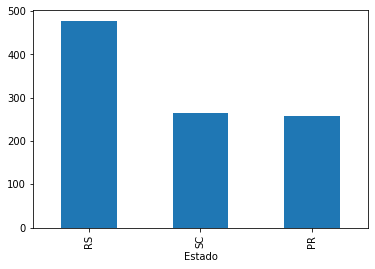

In [22]:
df_estado.plot(kind='bar')

13 - Você chegou até aqui? Consulte novamente a área de negócios pois eles tem uma informação importante para te passar.



In [23]:
df_estado

Estado
RS    478
SC    264
PR    257
dtype: int64

14 - Explore a variável *genero* vendo como essa variável está distribuida!

In [24]:
ch_csv.loc[ch_csv.Genero.isin(['F','Fem']),'Genero']='Feminino'
ch_csv.loc[ch_csv.Genero.isin(['M']),'Genero']='Masculino'

In [25]:
ch.loc[ch.Genero.isin(['F','Fem']),'Genero']='Feminino'
ch.loc[ch.Genero.isin(['M']),'Genero']='Masculino'
ch_csv.Genero.value_counts()

Masculino    527
Feminino     464
Name: Genero, dtype: int64

In [26]:
ch_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      999 non-null    int64  
 1   Id              999 non-null    int64  
 2   Score           999 non-null    int64  
 3   Estado          999 non-null    object 
 4   Genero          991 non-null    object 
 5   Idade           999 non-null    int64  
 6   Patrimonio      999 non-null    int64  
 7   Saldo           999 non-null    int64  
 8   Produtos        999 non-null    int64  
 9   TemCartCredito  999 non-null    int64  
 10  Ativo           999 non-null    int64  
 11  Salario         992 non-null    float64
 12  Saiu            999 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 101.6+ KB


In [27]:
ch.columns

Index(['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo',
       'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

15 - Consegue ver a mesma informação graficamente?

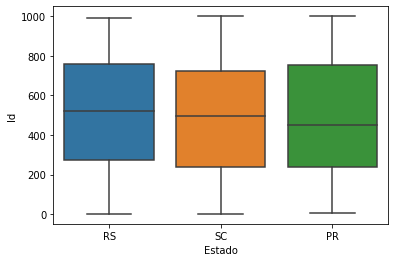

In [43]:
import seaborn as sns
sns.boxplot(data=ch,x='Estado',y='Id')

16 - Notou algo estranho? Acho que seu grupo precisa tomar uma decisão em relação a essa variável, o que farão?
Pode consultar a área de negócios se quiser ampliar a discussão!!

17 - Ainda na variável genero, veja se há dados faltantes:

In [44]:
dados_null=ch_csv.isnull().sum()
dados_null

Unnamed: 0        0
Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

18 - Decida o que irá fazer com esses dados e faça as alterações no dataset:

In [45]:
#Já foi feita, dropamos e isso já vai influenciar em futuas questões que pedem para verificar essa mesma info
ch_csv['Genero'].fillna(ch_csv['Genero'].mode,inplace=True)
ch_csv['Salario'].fillna(ch_csv['Salario'].mean,inplace=True)
ch.isnull().sum()


Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

19- Vamos agora explorar um pouco as variáveis numéricas! Veja algumas estatísticas da variável(coluna) 'Score':

Maximo, minimo, média etc


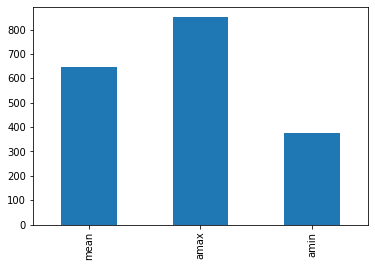

In [46]:
ch_csv['Score'].agg([np.mean,np.max,np.min]).plot(kind='bar')

20 - Conseguiria fazer um boxplot desssa variável

Pode consultar a documentação:

- Usando pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
- Usando seaborn: https://seaborn.pydata.org/generated/seaborn.boxplot.html


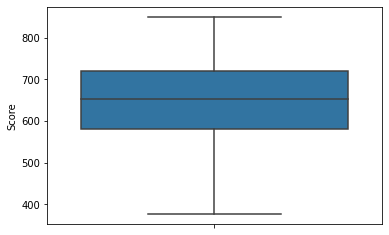

In [47]:
sns.boxplot(data=ch_csv,y='Score')

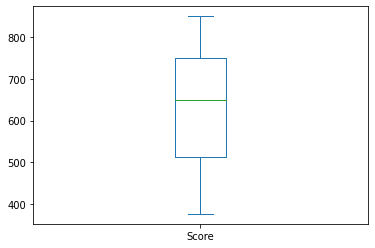

In [48]:
ch['Score'].agg([np.mean,np.max,np.min]).plot(kind='box')

21 - Uma forma de verificar a distribuição de uma variável continua é fazendo um histograma. Você poderia fazer um?

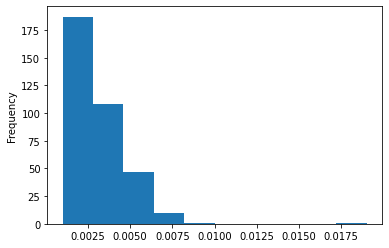

In [49]:
ch['Score'].value_counts(normalize=True).plot(kind='hist')

Documentação:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
- https://seaborn.pydata.org/generated/seaborn.histplot.html

22 - Veja algumas estatísticas da variável(coluna) 'Idade':

In [50]:

ch['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

23 - Notou algo estranho? Discuta com seu grupo!! 

24 - Como sugestão faça novamente um boxplot ou um histograma dessa variável.

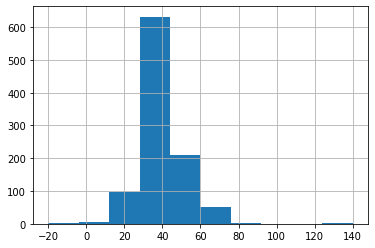

In [51]:
ch['Idade'].hist()

25 - Que decisão seu grupo irá tomar em relação a variável idade? Implemente as mudança que vocês dicutiram.

In [52]:
ch_idade=ch[(ch['Idade']<=100) & (ch['Idade']>0)]
ch_idade['Idade'].describe()

count    991.000000
mean      39.105954
std       10.350127
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

26 - Verifique a variável saldo, ou seja exiba algumas estatísticas

In [53]:
ch['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

27 - Faça um boxplot da variável saldo

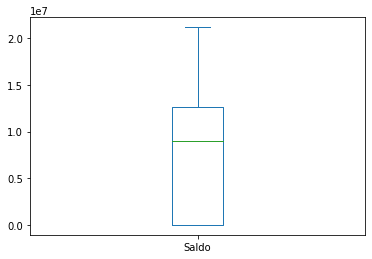

In [55]:
ch.Saldo.plot(kind='box')

28 - Examine a variável salário fazendo algumas estatísticas

In [54]:
ch['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

29 -  Não deu para ver muita coisa, não é? Use agora o poder da visualização! Faça um boxplot!

In [57]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


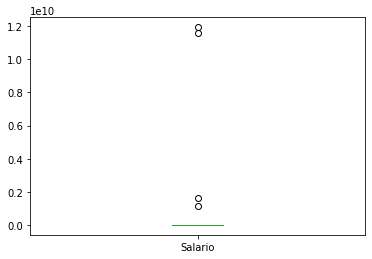

In [58]:
ch.Salario.plot(kind='box')

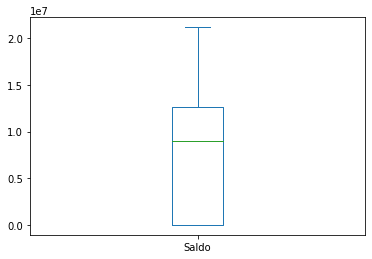

In [59]:
ch_csv.Saldo.plot(kind='box')

30 - O que você acha que aconteceu? Por quê não aparece o boxplot! Tente um histograma!!

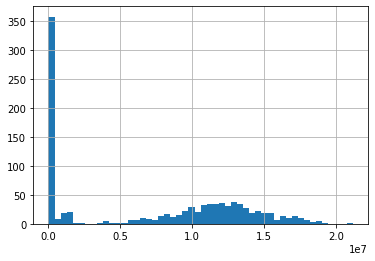

In [60]:
ch['Saldo'].hist(bins=50)

31 - Discuta com o grupo! Consulte a área de negócio! Os dados estão corretos?

In [62]:
#Supondo que são outliers! O que é isso:
##Os outliers são dados que se diferenciam drasticamente de todos os outros.
#Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá)
#causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

32 - A área de negocio informou que o valor salario não pode passar  de R$1061159976.6. E agora, como resolver! Discuta com o grupo!

In [61]:
ch[ch['Salario']<=1061159976.6]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [63]:
ch.loc[ch['Salario']<=1061159976.6]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


33 - Agora veja se o dataset tem algum valor nulo!

In [64]:
ch.isnull().sum()
ch.dropna().isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

34 - Há alguns nulos na variável salário. Discuta com o grupo o que fazer!!

In [ ]:
# Usamos o fillna em colunas que eram missing

0

35 -Parabéns por ter chegado até aqui!!